In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lanzamiento de una moneda

In [ ]:
num_lanzamientos = 10

lanzamientos = np.random.choice([0,1], size=num_lanzamientos)

total_caras = sum(lanzamientos==0)

print(f'Frecuencia de aparición {total_caras} y probabilidad de Cara en los lanzamientos de la moneda:{total_caras/num_lanzamientos}.')

Frecuencia de aparición 5 y probabilidad de Cara en los lanzamientos de la moneda:0.5.


# Teorema de Bayes y Simulación

El 15% de la población padece una enfermedad. Tenemos un test para detectarla; este test no es perfecto, tiene una sensibilidad del 98% y una especificidad del 95%.

Tanto la sensibilidad como la especificidad son probabilidades condicionadas.

Sensibilidad: "Se refiere a la dección de enfermos"->

P(Test Positivo|Enfermo).

Especificidad: "Se refiere a clasificar correctamente a los sanos"->

P(Test Negativo | No Enfermo)  = 0.95

A nivel de usuario nos interesa la probabilidad de tener la enfermedad dado que el test ha resultado ser positivo.



**P(Enfermo | Test Positivo)** = (P(Enfermo) * P(Test Positivo|Enfermo))/P(Test Positivo)

P(Enfermo) = 0.15

P(Test Positivo|Enfermo) = 0.98

P(Test Positivo) = P(Test Positivo|Enfermo)*P(Enfermo) + P(Test Positivo | No Enfermo)*P(No Enfermo) = 0.98 * 0.15 + (1-0.95)*(1-0.15) = 0.19

**P(Enfermo | Test Positivo)** = (P(Enfermo) * P(Test Positivo|Enfermo))/P(Test Positivo) = (0.15 * 0.98) / 0.19 = **0.775**

- Para obtener la probabilidad de que un test de positivo tenemos que tener en cuenta tanto los casos que da positivo en personas no enfermas y las veces que da positivo en personas enfermas.









/tmp/ipython-input-638277955.py:24: RuntimeWarning: invalid value encountered in scalar divide
  prob_sim = sum(pos_y_enfermo)/sum(res_test)


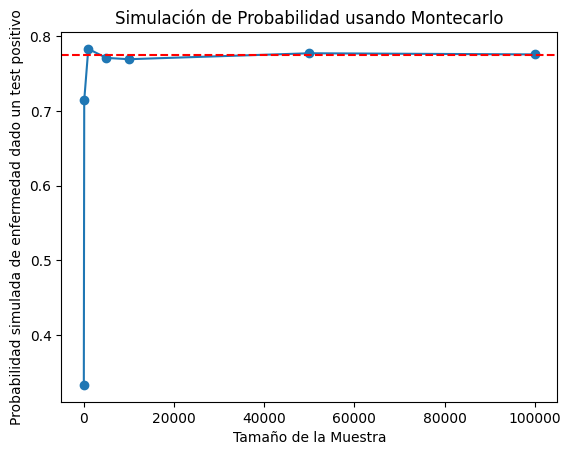

In [ ]:
sensibilidad=0.98
especificidad=0.95

# Dedfinimos una variable con diferentes tamaños poblacionales
tam_poblacional = [5, 10, 100, 1000, 5000, 10_000, 50_000, 100_000]

# Almacenaremos las probabiolidades simuladas
probs_simuladas = []

# Para cada tamaño poblacional
for num in tam_poblacional:
  # Generamos aleatoriamente un array de booleanos de modo que el 15% sean True
  enfermos = np.random.choice(a=[True, False], p=[0.15,0.85],size=num)

  # Generar una bolsa de resultados de tests de personas enfermas
  res_enfermos = np.random.choice(a=[True, False], p=[sensibilidad, 1-sensibilidad],size=num)
  res_sanos = np.random.choice(a=[True, False], p=[1-especificidad,especificidad],size=num)
  res_test = np.where(enfermos,res_enfermos,res_sanos)

  # Obtenemos el array de enfermos y positivos
  pos_y_enfermo = np.logical_and(enfermos,res_test)

  # Obtenemos la probabilidad simulada
  prob_sim = sum(pos_y_enfermo)/sum(res_test)

  probs_simuladas.append(prob_sim)

plt.plot(tam_poblacional, probs_simuladas,marker='o')
plt.axhline(0.775, color='red', linestyle='--')  # Valor teórico
plt.xlabel('Tamaño de la Muestra')
plt.ylabel('Probabilidad simulada de enfermedad dado un test positivo')
plt.title('Simulación de Probabilidad usando Montecarlo')
plt.show()

In [ ]:
np.logical_and([True,False,True],[True,False,True])

array([ True, False,  True])

# Intervalo de Confianza

In [ ]:
n_casas = 1_000
np.random.seed(0)
X = np.random.rand(n_casas, 1)
y = 6 + 10*X + np.random.randn(n_casas, 1)

# Ajustamos un modelo de regresión lineal de referencia para plotear la recta
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes estimados (intercepto y pendiente) para la recta
intercepto = model.intercept_[0]
pendiente = model.coef_[0][0]

# Total de muestras bootstrap
n_bootstrap = 10_000
libreta = np.zeros((n_bootstrap,2)) # Para ir anotando los resultados obtenidos

for i in range(n_bootstrap):
  # Seleccionar indices aleatorios con reemplazo
  indices = np.random.randint(0, n_casas, n_casas)
  # Seleccionar los datos y ajustar el modelo
  X_bootstrap = X[indices]
  y_bootstrap = y[indices]
  model.fit(X_bootstrap, y_bootstrap)
  # Anotar los ceoficientes/interceptos
  libreta[i, 0] = model.intercept_[0]
  libreta[i, 1] = model.coef_[0][0]

In [ ]:
# Si quiero el IC al 95% dejo
alpha = 0.05  # Nivel de confianza del 95%
lower_percentile = 100 * alpha / 2 # Deja afuera las observaciones por debajo del percentil 2.5% (por eso alfa/2)
upper_percentile = 100 * (1 - alpha / 2) # Deja afuera las observaciones por encima del percentil 97.5%

In [ ]:
upper_percentile

97.5

In [ ]:
lower_percentile

2.5

In [ ]:
intercepto_ci = np.percentile(libreta[:, 0], [lower_percentile, upper_percentile])
pendiente_ci = np.percentile(libreta[:, 1], [lower_percentile, upper_percentile])

In [ ]:
intercepto_ci

array([5.96148854, 6.19615921])

In [ ]:
pendiente_ci

array([ 9.69157876, 10.10037423])

[]

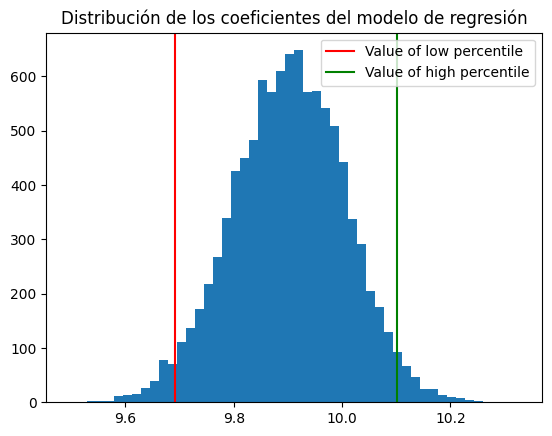

In [ ]:
coeficientes = libreta[:, 1]
plt.title('Distribución de los coeficientes del modelo de regresión')
plt.hist(coeficientes ,bins=50)
plt.axvline(x = pendiente_ci[0], color = 'r', label='Value of low percentile')
plt.axvline(x = pendiente_ci[1], color = 'g', label='Value of high percentile')
plt.legend()
plt.plot()